# The Classification of Wine

### Introduction 

Given the chemical properties (specifically, Flavanoid and Color Intensity) of an unknown wine, is it possible to accurately classify the wine's type?

We are using the Wine Dataset from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine). In which different types of wine (Pinot Noir, Merlot, and Cabernet Sauvignon), grown in the same region but using different cultivators, are examined.  The different cultivators allow for different chemical constituents of each type of wine, hence, the goal of this project is to see if we can classify types of wine given chemical predictors.

According to Jonathon Betchels (https://jonathonbechtel.com/blog/2018/02/06/wines/), it’s most likely the three classes of wine in the set: 1, 2, and 3 matches with Pinot Noir, Cabernet Sauvignon, and Merlot respectively. This set also contains data on 13 attributes: Alcohol content, Malic Acid, Ash, Magnesium, Total Phenols, Flavanoids, Nonflavanoid Phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline. There are 178 different observations of wine samples in this data set.

### Preliminary exploratory data analysis

In [108]:
# Install and load necessary packages
install.packages("GGally")
library(repr)
library(tidyverse)
library(GGally)
options(repr.matrix.max.rows = 15)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [109]:
## Read dataset from the web into R
wine <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
                 col_names = FALSE)
head(wine)

Rows: 178 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450



The first column is our class, and it's currently of type numeric (`<dbl>`). Since we'll be treating class as a categorical variable, we'll convert it to type factor.

In [110]:
## Clean and Wrangle

# assign column names
colnames(wine) <- c("class", "alcohol", "acid", "ash", "alcalinity", "mg", "total_phenol", 
                    "flavanoid", "non_f_phenol", "proantho", "color", "hue", "od280/od315", "proline")

# convert type where applicable
wine <- wine %>%
        mutate(class = as.factor(class), mg = as.integer(mg), proline = as.integer(proline))
head(wine)

class,alcohol,acid,ash,alcalinity,mg,total_phenol,flavanoid,non_f_phenol,proantho,color,hue,od280/od315,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


After some research and exploratory data analysis, we decided to narrow down to exploring 5 variables that we've seen to be the most relevant to `class`. The 5 variables are: `alcohol`, `flavanoid`, `color`, `hue`, `proline`. 

In [111]:
## Summarization of data
options(digits = 4)

# create new data set with chosen variables
wine_main <- select(wine, class, alcohol, flavanoid, color, hue, proline)

# create table that summarizes total observations, variables, and missing values of data set
total_observations <- nrow(wine)
total_variables <- ncol(wine)
total_na <- sum(is.na(wine))
table1 <- data.frame(total_observations, total_variables, total_na)

# create summary table of observations in each class of data set
obs_per_class <- wine %>%
    group_by(class) %>%
    summarize(count = n(),
    percentage = n() / total_observations * 100)

# creat summary table for the means and standard deviation of chosen variables
means_of_var <- wine_main %>%
    summarize(across(alcohol:proline, mean)) %>%
    pivot_longer(cols = alcohol:proline,
                 names_to = "chemical_components",
                 values_to = "mean")

sd_of_var <- wine_main %>%
    select(alcohol:proline) %>%
    map_dfr(sd) %>%
    pivot_longer(cols = alcohol:proline,
                 names_to = "chemical_components",
                 values_to = "sd") %>%
    select(sd)

summary_tbl <- bind_cols(means_of_var, sd_of_var) %>%
    arrange(mean)

In [112]:
# Number of total observations, variables (including class), and missing values
table1

total_observations,total_variables,total_na
<int>,<int>,<int>
178,14,0


In [113]:
# Number and percentage of observations in each class
obs_per_class

class,count,percentage
<fct>,<int>,<dbl>
1,59,33.15
2,71,39.89
3,48,26.97


In [114]:
# Means and SD of chosen variables, arranged in ascending order by mean
summary_tbl

chemical_components,mean,sd
<chr>,<dbl>,<dbl>
hue,0.9574,0.2286
flavanoid,2.0293,0.9989
color,5.0581,2.3183
alcohol,13.0006,0.8118
proline,746.8933,314.9075


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



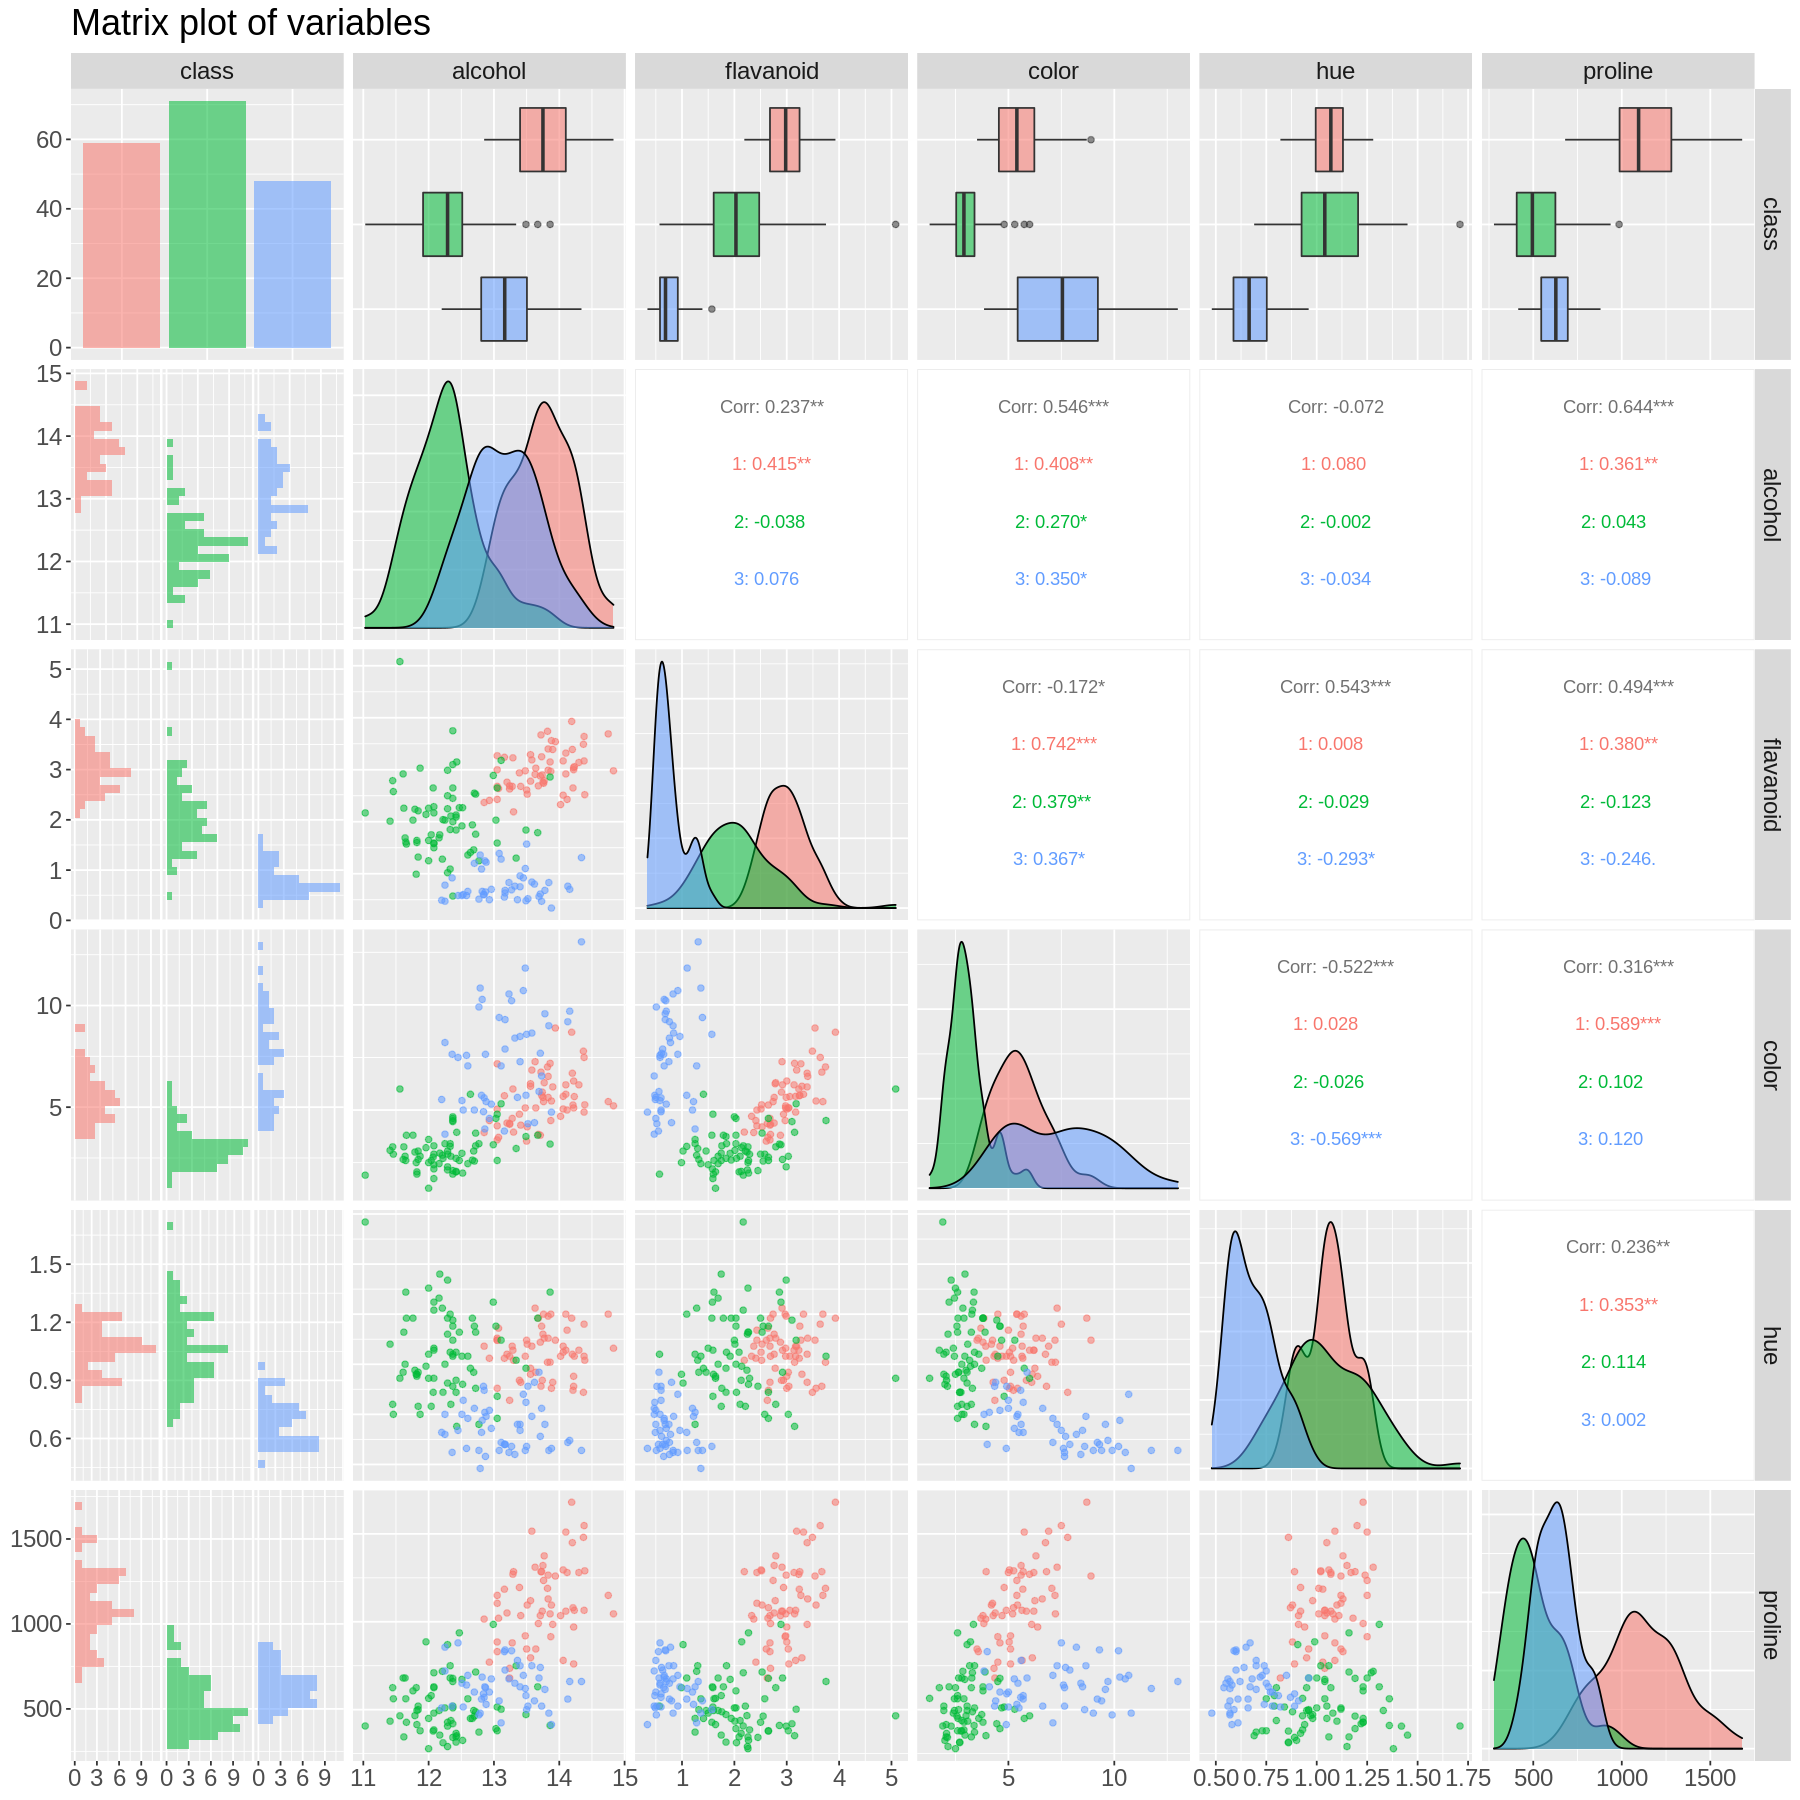

In [115]:
# Visualization using matrix plot to examine each pair of variables in the chosen set
options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(wine_main, aes(color = class, alpha = 0.5), title = "Matrix plot of variables") +
    theme(text = element_text(size = 18))

Looking at the matrix plot above (histograms and box plots), it’s apparent the distribution of different wine classes within `flavanoid` and `color` overlaps the least in comparison to other variables. The separation of different classes within a variable makes the classification of wine type clearer as each type would have a more distinct range of values within the variable. Furthermore, in examining the scatter plot of `flavanoid` and `color` it’s evident there is little overplotting of classes' data points, as well as the distribution of different classes are distinct. Hence, we believe `flavanoid` and `color` would be the best predictors for this project.

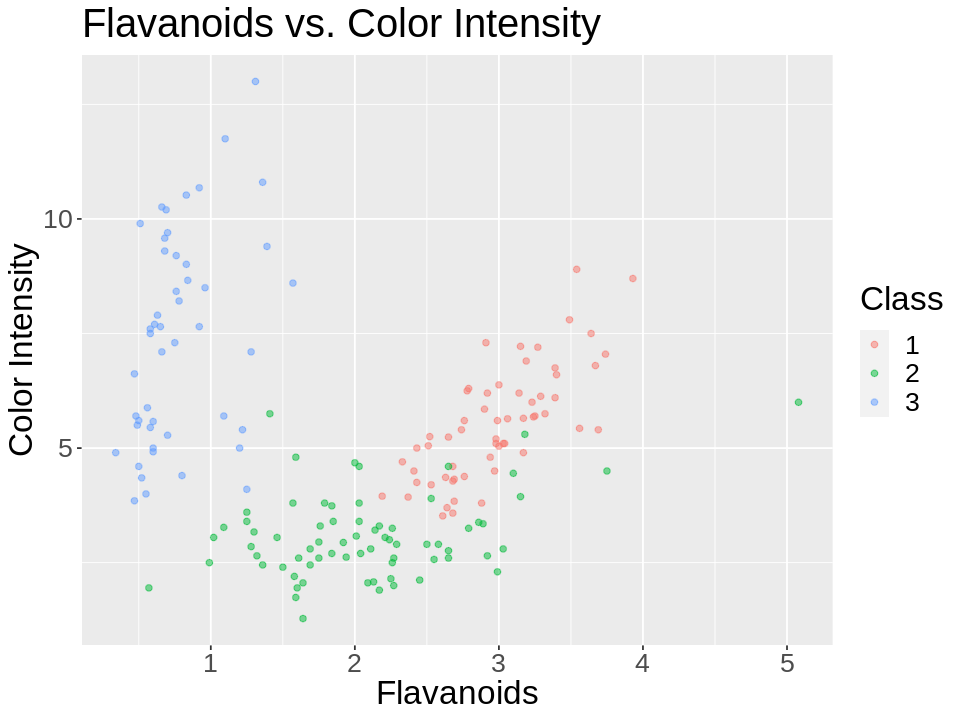

In [116]:
# Clearer scatter plot of Flavanoid vs Color Intensity 
options(repr.plot.width = 8, repr.plot.height = 6)
plot_flava_color <- ggplot(wine, aes(x = flavanoid, y = color, color = class)) +
                      geom_point(alpha = 0.5) +
                      labs(x = "Flavanoids", y = "Color Intensity", color = "Class") +
                      ggtitle("Flavanoids vs. Color Intensity") +
                      theme(text = element_text(size = 20))
plot_flava_color

### Methods
With the reasoning given above and further research, we decided to use Flavanoids and Color Intensity as predictors. `class`, `flavanoid`, `color` will be columns used in data analysis 

This is a classification problem so we use the K-nearest neighbors algorithm. The main library used to perform this algorithm is `tidymodels`.

Scatter plots, Line plots, Tables will be used for visualization. Scatter plot could be for visualizing the distribution of class given predictors. Line plots are used when determining K. Tables are used to display results like classifier's accuracy.

### Expected outcomes and significance
We expect to find the most relevant class for an unknown wine type given its chemical analysis. We hope that our model's accuracy could fall above 85%.

The impact of these findings are significant, as within British Columbia the wine industry contributes an annual 2.8 billion dollars, and 339.53 billion globally. Consumers are specific on the type of wine they wish to purchase so accurately classifying the types of wine are important to the wine industry. 

This classification could lead to a vast possibility of questions such as: Is one type of wine healthier to consume than another? Which type of wine is more sought after and more heavily consumed?


